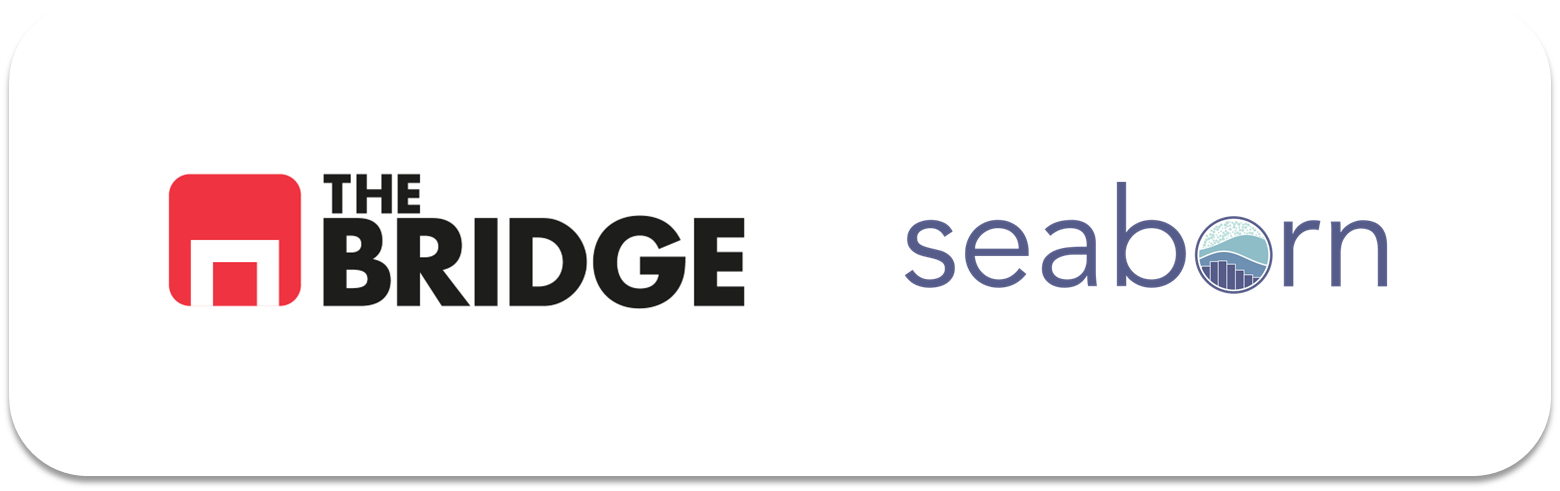

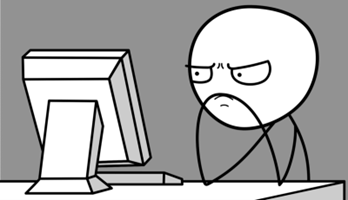

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajess = pd.read_csv("./data/dataset_viajes_jun23.csv")


In [6]:
df_bitcoin['fechas']=pd.to_datetime(df_bitcoin['date'])
df_bitcoin.set_index('fechas', inplace=True)
df_bitcoin.drop('date',axis=1,inplace=True)
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

def plot_categorical_frequencies(df, categorical_columns):
    """
    Dibuja una matriz de diagramas de barras para columnas categóricas.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        categorical_columns (list of str): Lista de nombres de columnas categóricas.
    """
    # Determinamos el número de filas necesarias para tener 2 columnas
    num_columns = 2
    num_plots = len(categorical_columns)
    num_rows = (num_columns // 2) + (num_columns % 2)

    # Creamos el lienzo de las gráficas
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5))
    axes = axes.flatten()  # Aseguramos que los ejes sean unidimensionales

    # Iteramos por las columnas categóricas y generamos las gráficas
    for i, column in enumerate(categorical_columns):
        ax = axes[i]  # Seleccionamos el eje correspondiente
        sns.countplot(data=df, x=column, ax=ax, hue=column , palette="bright") #, palette="tab10"
        ax.set_title(f"Frecuencias Absolutas de {column}", fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel("Frecuencia", fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    # Si hay ejes restantes (no utilizados), los eliminamos
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

    # Ajustamos el diseño
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# df = pd.DataFrame({
#     'Col1': ['A', 'B', 'A', 'C'],
#     'Col2': ['X', 'Y', 'Y', 'X'],
#     'Col3': ['P', 'P', 'Q', 'Q']
# })
# plot_categorical_frequencies(df, ['Col1', 'Col2', 'Col3'])




In [24]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False, giro = 45):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=giro)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


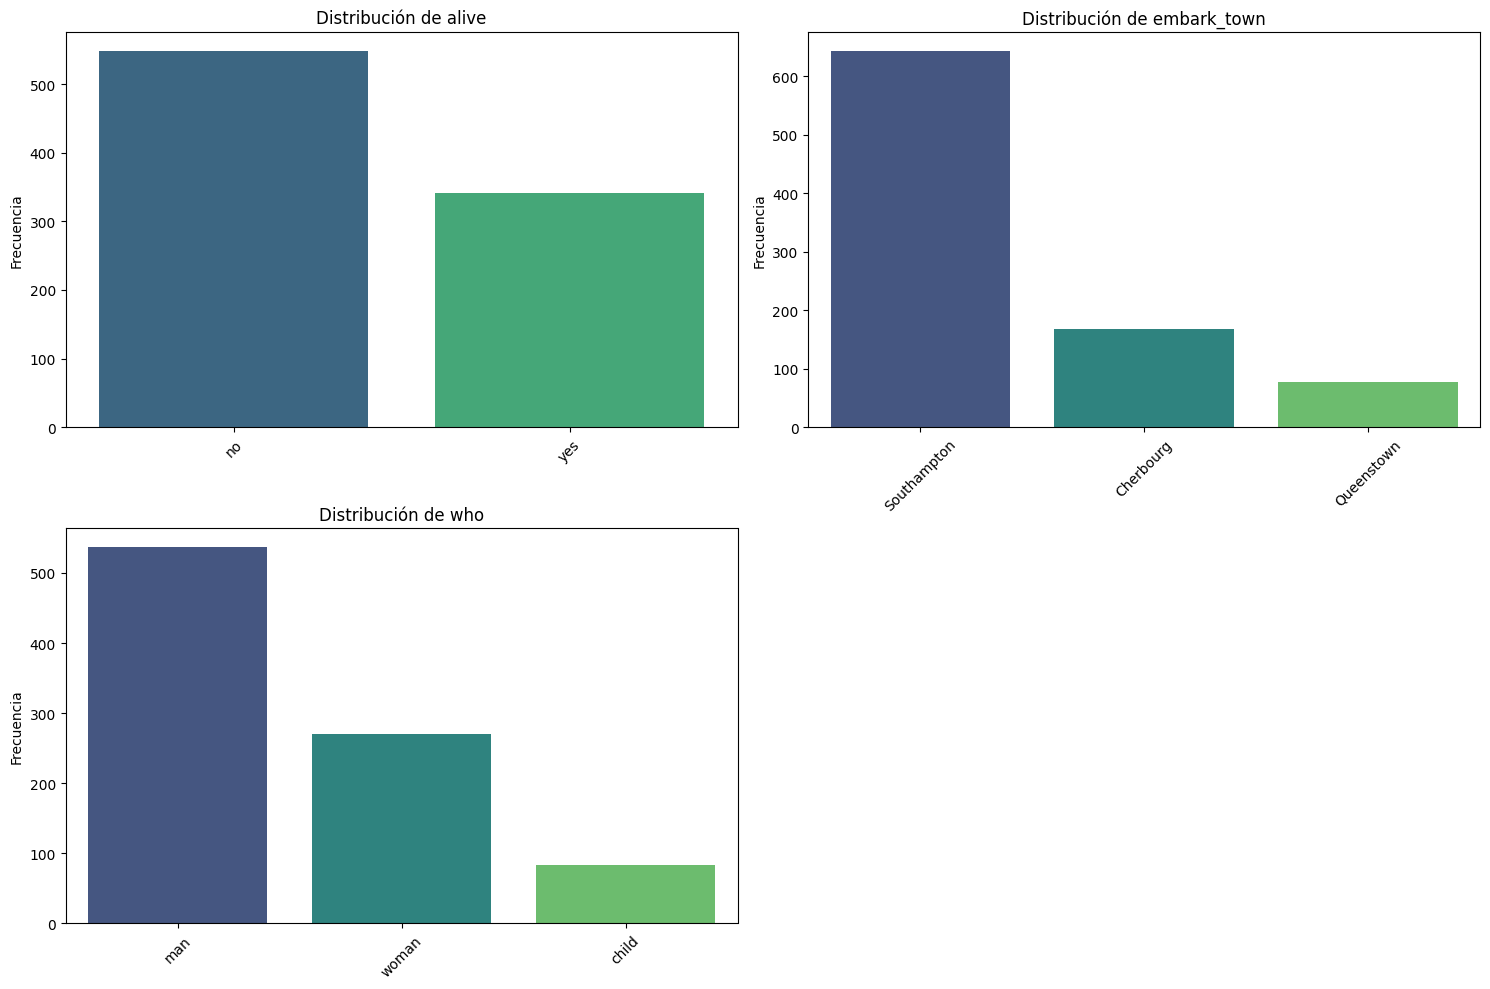

In [25]:
categorical_columns = ['alive', 'embark_town', 'who']
#plot_categorical_frequencies(df_titanic, categorical_columns)
pinta_distribucion_categoricas(df_titanic, categorical_columns)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [30]:
def plot_numerical_histograms(df, numerical_columns, bins=None, include_density=False):
    """
    Dibuja una matriz de histogramas para columnas numéricas.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        numerical_columns (list of str): Lista de nombres de columnas numéricas.
        bins (list of int or int): Número de bins para cada histograma o un único número para todos.
        include_density (bool): Si se incluye o no la función de densidad.
    """
    # Determinamos el número de filas necesarias para tener 2 columnas
    num_columns = 2
    num_plots = len(numerical_columns)
    num_rows = math.ceil(num_plots / num_columns)

    # Creamos el lienzo de las gráficas
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5))
    axes = axes.flatten()  # Aseguramos que los ejes sean unidimensionales

    # Manejo de bins: si es un único valor, lo convertimos en una lista repetida
    if isinstance(bins, int):
        bins = [bins] * len(numerical_columns)
    elif bins is None:
        bins = [10] * len(numerical_columns)  # Valor por defecto si no se especifica

    # Iteramos por las columnas numéricas y generamos las gráficas
    for i, column in enumerate(numerical_columns):
        ax = axes[i]  # Seleccionamos el eje correspondiente
        sns.histplot(data=df, x=column, bins=bins[i], kde=include_density, ax=ax, color="skyblue")
        ax.set_title(f"Histograma de {column}", fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel("Frecuencia", fontsize=12)

    # Si hay ejes restantes (no utilizados), los eliminamos
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

    # Ajustamos el diseño
    plt.tight_layout()
    plt.show()

# Ejemplo de uso

### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

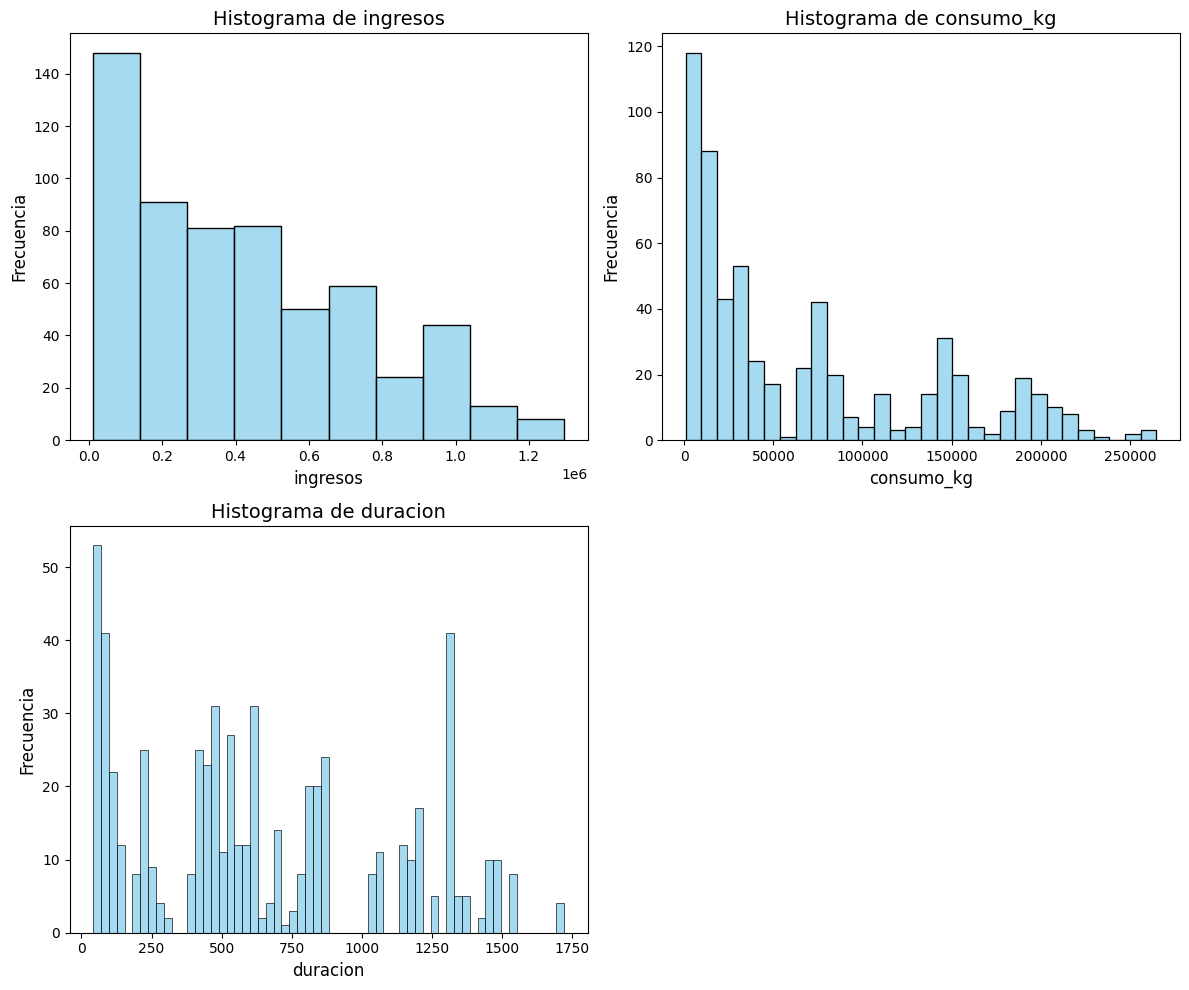

In [32]:
numerical_colums= ['ingresos', 'consumo_kg', 'duracion']
bins=[10,30,60]
plot_numerical_histograms(df_viajess,numerical_colums,bins=bins)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

In [ ]:
#visualiza solo estas columnas
df_bitcoin[['open','close','high','low']] 
#df_bitcoin.describe()


,open,close,high,low
fechas,,,,
2022-03-01,43221.71,43185.48,43626.49,43185.48
2022-02-28,37717.10,43178.98,44256.08,37468.99
2022-02-27,39146.66,37712.68,39886.92,37015.74
2022-02-26,39242.64,39146.66,40330.99,38600.00
2022-02-25,38360.93,39231.64,39727.97,38027.61
...,...,...,...,...
2014-12-02,378.39,379.25,382.86,375.23
2014-12-01,376.40,378.39,382.31,373.03
2014-11-30,376.57,373.34,381.99,373.32


In [61]:
df_bitcoin.close.sample(10)

fechas
2021-07-28    40036.32
2020-07-22     9539.51
2017-09-11     4207.31
2016-01-21      410.03
2020-08-01    11817.49
2016-03-01      433.31
2017-08-16     4378.84
2017-07-07     2501.46
2021-01-19    35917.62
2019-02-12     3585.94
Name: close, dtype: float64

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [41]:
def plot_time_series(df, columns, combined=False, start_date=None, end_date=None):
    """
    Dibuja series temporales para las columnas indicadas.

    Args:
        df (pd.DataFrame): DataFrame con los datos, con fechas como índice.
        columns (list of str): Lista de nombres de columnas para las series temporales.
        combined (bool): Si True, dibuja todas las series en una sola gráfica con leyenda.
        start_date (str or None): Fecha de inicio (formato 'YYYY-MM-DD').
        end_date (str or None): Fecha de fin (formato 'YYYY-MM-DD').
    """
    # Filtrar por rango de fechas si es necesario
    if start_date or end_date:
        df = df.loc[start_date:end_date]

    if combined:
        # Dibujar todas las series en una sola gráfica
        plt.figure(figsize=(12, 6))
        for column in columns:
            sns.lineplot(data=df, x=df.index, y=column, label=column)
        plt.title("Evolución de Series Temporales", fontsize=14)
        plt.xlabel("Fecha", fontsize=12)
        plt.ylabel("Valores", fontsize=12)
        plt.legend(title="Series", fontsize=10)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        # Determinar el número de filas y columnas para la cuadrícula
        num_columns = 2
        num_plots = len(columns)
        num_rows = math.ceil(num_plots / num_columns)

        # Crear subplots
        fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5))
        axes = axes.flatten()

        # Dibujar cada serie en su propio subplot
        for i, column in enumerate(columns):
            sns.lineplot(data=df, x=df.index, y=column, ax=axes[i])
            axes[i].set_title(f"Evolución de {column}", fontsize=14)
            axes[i].set_xlabel("Fecha", fontsize=12)
            axes[i].set_ylabel("Valores", fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)

        # Eliminar subplots innecesarios
        for j in range(len(columns), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

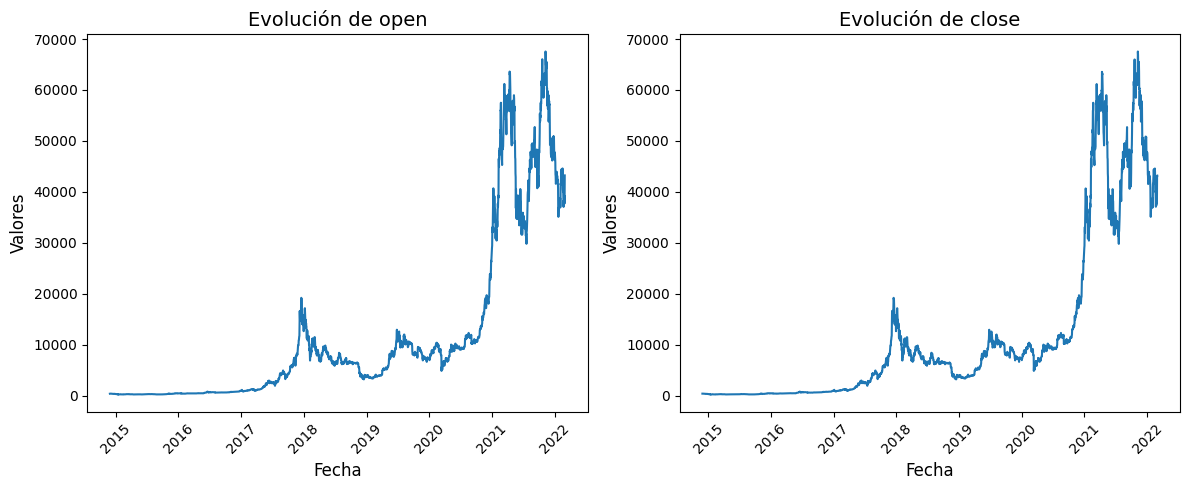

In [42]:
plot_time_series(df_bitcoin, ['open','close'])


In [63]:
plot_time_series(df_bitcoin, ['open','close'], start_date='2017-01-01', end_date='2020-08-01')

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'